# oasis Infobyte

## Batch - March P2

## Data Science Internship

### Task 5: Sales prediction using python

### Intern Name: Poulami Ghosh

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


## Exploratory Data Analysis

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Data Pre-processing

In [7]:
sales_data=data.drop(columns='Unnamed: 0')
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
sales_data.duplicated().any()

False

## Visualization

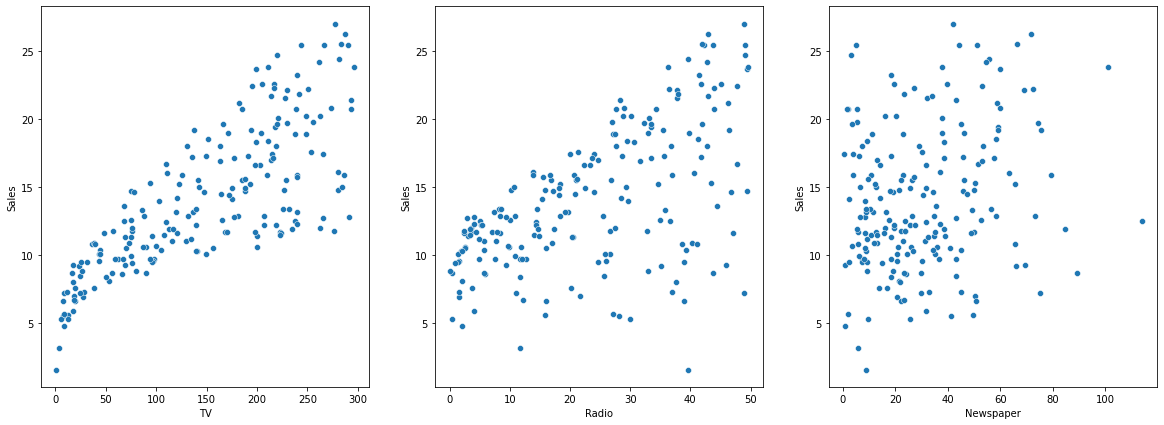

In [10]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.scatterplot(x='TV', y='Sales', data= sales_data)

plt.subplot(1,3,2)
sns.scatterplot(x='Radio', y='Sales', data= sales_data)

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper', y='Sales', data= sales_data)
plt.show()

## Preparing Data for Model 

In [11]:
x=sales_data.drop(columns='Sales')
y=sales_data['Sales']

In [12]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.20, random_state = 0)

## Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler
st_sc=StandardScaler()

In [16]:
x_train_sc=st_sc.fit_transform(x_train)
x_test_sc=st_sc.fit_transform(x_test)

## Model Training

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_sc, y_train)

LinearRegression()

In [18]:
y_pred=lr.predict(x_test_sc)
y_pred

array([11.08042581,  8.57343776,  8.15879965, 24.58135699, 12.97096769,
        7.69489354, 13.70600703, 15.94537417, 11.76873223, 17.13178106,
       23.42889215, 10.18859851, 11.47372715, 16.30736957, 12.55127043,
       13.11671676, 19.46267102, 11.77596706, 16.70931294, 18.05859285,
       24.57024897, 10.63992212, 15.96998765, 13.32395307,  6.90097179,
       16.07496141, 13.23498612, 21.55685746, 14.31007566, 10.10589173,
       13.81648354, 22.0034185 , 18.86260696, 21.78054154,  7.72605172,
        7.31151845,  8.9972093 , 13.93308943, 15.53865727,  7.35767297])

## Finding different score

In [19]:
from sklearn import metrics 
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2_score:", metrics.r2_score(y_test, y_pred))

MAE: 1.4820534519182238
MSE: 5.408913759032387
R2_score: 0.8281217233452883


### The accuracy we got here is 82.81%